In [146]:
#Import relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [147]:
#set datafram display 
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)

In [148]:
#import datasets
df_listing=pd.read_csv("listings.csv")
df_calendar=pd.read_csv("calendar.csv")

#make copies of each dataframe
df_listing_ori=df_listing.copy()
df_calendar_ori=df_calendar.copy()

## Calender Dataset - Data Preperation

In [149]:
#Pricing column has Nan values
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [150]:
df_calendar['price'] = df_calendar.groupby('listing_id')['price'].transform(lambda v: v.ffill())


In [151]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       1226405 non-null  object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [152]:
#drop rows where the price is Nan
df_calendar=df_calendar.dropna(subset=["price"], axis=0)

#Check Non Nan count is the same
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1226405 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1226405 non-null  int64 
 1   date        1226405 non-null  object
 2   available   1226405 non-null  object
 3   price       1226405 non-null  object
dtypes: int64(1), object(3)
memory usage: 46.8+ MB


In [153]:
df_calendar['month'] = df_calendar.apply(lambda row: int(row['date'].split('-')[1]),axis=1)
#df_calendar['year'] = df_calendar.apply(lambda row: int(row['date'].split('-')[0]),axis=1)
df_calendar.head(50)

,listing_id,date,available,price,month
0,241032,2016-01-04,t,$85.00,1
1,241032,2016-01-05,t,$85.00,1
2,241032,2016-01-06,f,$85.00,1
3,241032,2016-01-07,f,$85.00,1
4,241032,2016-01-08,f,$85.00,1
5,241032,2016-01-09,f,$85.00,1
6,241032,2016-01-10,f,$85.00,1
7,241032,2016-01-11,f,$85.00,1
8,241032,2016-01-12,f,$85.00,1
9,241032,2016-01-13,t,$85.00,1


In [154]:
#drop date attribute
df_calendar.drop(["date"],inplace=True,axis=1),

df_calendar.head()

,listing_id,available,price,month
0,241032,t,$85.00,1
1,241032,t,$85.00,1
2,241032,f,$85.00,1
3,241032,f,$85.00,1
4,241032,f,$85.00,1


In [155]:
df_calendar.shape

(1226405, 4)

In [156]:
#remove duplicate rows
df_calendar=df_calendar.drop_duplicates()

In [157]:
df_calendar.shape

(87608, 4)

In [158]:
df_calendar.head(5)

,listing_id,available,price,month
0,241032,t,$85.00,1
2,241032,f,$85.00,1
28,241032,t,$85.00,2
38,241032,f,$85.00,2
57,241032,t,$85.00,3


In [94]:
def strtofloat(df,dollar_cols):
    '''
    Input:dataframe, list of columns you'd like to convert from $ strings to floats
    Output: returns the input data frame with the converted value in place
    '''
    for col in dollar_cols:
            df[col]=df[col].str.replace("[$, ,%]", "")  
            df[col]=df[col].astype("float")

dollar_cols=["price"]            
strtofloat(df_calendar,dollar_cols)
df_calendar[dollar_cols].head()

,price
0,85.0
2,85.0
28,85.0
38,85.0
57,85.0


In [95]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87608 entries, 0 to 1393537
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   listing_id  87608 non-null  int64  
 1   available   87608 non-null  object 
 2   price       87608 non-null  float64
 3   month       87608 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ MB


In [96]:
#columns full of unique values
def unique_columns(df):
    '''
    Input:dataframe
    Output: print columns that are full of unique values
    '''

    for col in df.columns:
        a=len(df[col].unique())/df.shape[0]
        if a==1:
            print(col+" "+'%.2f' %a)
    print("end")
unique_columns(df_calendar)

end


In [97]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87608 entries, 0 to 1393537
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   listing_id  87608 non-null  int64  
 1   available   87608 non-null  object 
 2   price       87608 non-null  float64
 3   month       87608 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ MB


## Listing Dataset - Data Preperation

In [98]:
#rename the 'id' column in listing.csv to 'listing_id'
df_listing = df_listing.rename(index=str, columns = {'id':'listing_id'})

In [99]:
df_listing.head(2)

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.64,-122.37,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.64,-122.37,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [100]:
unique_columns(df_listing)

listing_id 1.00
listing_url 1.00
picture_url 1.00
latitude 1.00
longitude 1.00
end


In [101]:
#list of fields that I want to drop
columns_to_drop=[]
unique_cols=["listing_url",
             "picture_url",
             "latitude",
             "longitude"]
columns_to_drop=columns_to_drop+unique_cols
columns_to_drop

['listing_url', 'picture_url', 'latitude', 'longitude']

In [102]:
def cols_with_few(df,threshold):
    '''
    Input: Dataframe, threshold of unique values
    Output: Prints of fields and the unique values they contain
    Global variables: few, a list of fields
    '''
    global few
    few=[]

    for col in df.columns:
        a=df[col].unique().shape[0]
        if a<threshold:
            a=df_listing[col].value_counts()
            print("")
            print("##############")
            print(col)
            print(a)


In [103]:
cols_with_few(df_listing,5)


##############
scrape_id
20160104002432    3818
Name: scrape_id, dtype: int64

##############
last_scraped
2016-01-04    3818
Name: last_scraped, dtype: int64

##############
experiences_offered
none    3818
Name: experiences_offered, dtype: int64

##############
host_acceptance_rate
100%    3044
0%         1
Name: host_acceptance_rate, dtype: int64

##############
host_is_superhost
f    3038
t     778
Name: host_is_superhost, dtype: int64

##############
host_has_profile_pic
t    3809
f       7
Name: host_has_profile_pic, dtype: int64

##############
host_identity_verified
t    2997
f     819
Name: host_identity_verified, dtype: int64

##############
state
WA    3817
wa       1
Name: state, dtype: int64

##############
market
Seattle    3818
Name: market, dtype: int64

##############
country_code
US    3818
Name: country_code, dtype: int64

##############
country
United States    3818
Name: country, dtype: int64

##############
is_location_exact
t    3412
f     406
Name: is_location_

In [104]:
few_columns=["scrape_id",
             "last_scraped",
             "experiences_offered",
             "host_acceptance_rate",
             "host_has_profile_pic",
             "state",
             "market",
             "country_code",
             "country",
             "has_availability",
            "calendar_last_scraped",
             "requires_license",
             "license",
             "jurisdiction_names",
             "instant_bookable"]
columns_to_drop=columns_to_drop+few_columns
columns_to_drop = [i for j, i in enumerate(columns_to_drop) if i not in columns_to_drop[:j]] 
columns_to_drop

['listing_url',
 'picture_url',
 'latitude',
 'longitude',
 'scrape_id',
 'last_scraped',
 'experiences_offered',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'state',
 'market',
 'country_code',
 'country',
 'has_availability',
 'calendar_last_scraped',
 'requires_license',
 'license',
 'jurisdiction_names',
 'instant_bookable']

In [105]:
df_listing_drop1=df_listing.drop(columns_to_drop,axis=1)
df_listing_drop1.head()

,listing_id,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,smart_location,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN,NaN,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,"Seattle, WA",t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,"Seattle, WA",t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,NaN,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,"West Lee Street, Seattle, WA 98119, United States",Qu

In [106]:
cols_with_few(df_listing_drop1,10)


##############
host_response_time
within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

##############
host_is_superhost
f    3038
t     778
Name: host_is_superhost, dtype: int64

##############
host_identity_verified
t    2997
f     819
Name: host_identity_verified, dtype: int64

##############
city
Seattle                  3810
West Seattle                2
Seattle                     2
Ballard, Seattle            1
Phinney Ridge Seattle       1
西雅图                         1
seattle                     1
Name: city, dtype: int64

##############
smart_location
Seattle, WA                  3810
Seattle , WA                    2
West Seattle, WA                2
Ballard, Seattle, WA            1
Phinney Ridge Seattle, WA       1
西雅图, WA                         1
seattle, wa                     1
Name: smart_location, dtype: int64

##############
is_location_exact
t    3412
f     406
Name: is_l

In [107]:
few_columns=["city",
             "smart_location"]
columns_to_drop=columns_to_drop+few_columns
columns_to_drop = [i for j, i in enumerate(columns_to_drop) if i not in columns_to_drop[:j]] 
df_listing_drop2=df_listing.drop(columns_to_drop,axis=1,errors="ignore")
df_listing_drop2.head()

,listing_id,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN,NaN,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,NaN,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,98119,t,House,Entire home/ap

In [108]:
df_listing_drop2["host_verifications"].value_counts()

['email', 'phone', 'facebook', 'reviews', 'kba']                                 595
['email', 'phone', 'reviews', 'kba']                                             436
['email', 'phone', 'reviews']                                                    329
['email', 'phone', 'facebook', 'reviews', 'jumio']                               322
['email', 'phone', 'reviews', 'jumio']                                           194
                                                                                ... 
['phone', 'facebook', 'google', 'linkedin', 'reviews', 'jumio']                    1
['email', 'phone', 'facebook', 'linkedin', 'amex', 'reviews', 'jumio', 'kba']      1
['phone', 'facebook', 'google']                                                    1
['email', 'phone', 'facebook', 'amex', 'reviews', 'kba']                           1
['email', 'phone', 'facebook', 'jumio', 'kba']                                     1
Name: host_verifications, Length: 116, dtype: int64

In [109]:
text_cols=["name",
           "summary",
           "space",
           "description",
           "neighborhood_overview",
           "notes",
           "transit",
           "thumbnail_url",
           "medium_url",
           "xl_picture_url",
           "host_id",
           "host_url",
           "host_name",
           "host_since",
           "host_location",
           "host_about",
           "host_thumbnail_url",
           "host_picture_url",
           "host_verifications",
           "calendar_updated",
           "street"]
columns_to_drop=columns_to_drop+text_cols
columns_to_drop = [i for j, i in enumerate(columns_to_drop) if i not in columns_to_drop[:j]] 
df_listing_drop3=df_listing.drop(columns_to_drop,axis=1,errors="ignore")
df_listing_drop3.head()

,listing_id,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,within a few hours,96%,f,Queen Anne,3.0,3.0,t,Queen Anne,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f,2,4.07
1,953595,within an hour,98%,t,Queen Anne,6.0,6.0,t,Queen Anne,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,t,t,6,1.48
2,3308979,within a few hours,67%,f,Queen Anne,2.0,2.0,t,Queen Anne,West Queen Anne,Queen Anne,98119,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,1,6,17,220,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,2,1.15
3,7421966,NaN,NaN,f,Queen Anne,1.0,1.0,t,Queen Anne,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,$100.00,$650.00,"$2,300.00",NaN,NaN,1,$0.00,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,f,f,1,NaN
4,278830,within an hour,100%,f,Queen Anne,2.0,2.0,t,Queen Anne,West Queen Anne,Queen Anne,98119,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$450.00,NaN,NaN,$700.00,$125.00,6,$15.00,1,1125,30,60,90,365,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,f,f,1,0.89


In [110]:
redundant_cols=["host_neighbourhood",
                "host_listings_count",
                "host_total_listings_count",
                "neighbourhood",
                "neighbourhood_cleansed",
                "zipcode",
                "is_location_exact",
                "guests_included",
                "price",
                "minimum_nights",
                "maximum_nights",
                "availability_30",
                "availability_60",
                "availability_90",
                "first_review",
                "last_review",
                "calculated_host_listings_count",
                "reviews_per_month",
                "host_identity_verified"]

binary_cols=["weekly_price",
             "monthly_price",
             "security_deposit",
             "extra_people",
             "cleaning_fee"]

multicolinearity_cols=["review_scores_rating",
                        "review_scores_accuracy",
                        "review_scores_cleanliness",
                        "review_scores_checkin",
                        "review_scores_communication",
                        "review_scores_location",
                        "review_scores_value"]

In [111]:
columns_to_drop=columns_to_drop+redundant_cols
columns_to_drop = [i for j, i in enumerate(columns_to_drop) if i not in columns_to_drop[:j]] 
df_listing_drop4=df_listing.drop(columns_to_drop,axis=1,errors="ignore")
df_listing_drop4.head()

,listing_id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,241032,within a few hours,96%,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,NaN,NaN,NaN,NaN,$5.00,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f
1,953595,within an hour,98%,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,"$1,000.00","$3,000.00",$100.00,$40.00,$0.00,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,t,t
2,3308979,within a few hours,67%,f,Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,NaN,NaN,"$1,000.00",$300.00,$25.00,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f
3,7421966,NaN,NaN,f,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,$650.00,"$2,300.00",NaN,NaN,$0.00,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,f,f
4,278830,within an hour,100%,f,Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,NaN,NaN,$700.00,$125.00,$15.00,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,f,f


In [112]:
df_listing_drop4[binary_cols].head()

,weekly_price,monthly_price,security_deposit,extra_people,cleaning_fee
0,NaN,NaN,NaN,$5.00,NaN
1,"$1,000.00","$3,000.00",$100.00,$0.00,$40.00
2,NaN,NaN,"$1,000.00",$25.00,$300.00
3,$650.00,"$2,300.00",NaN,$0.00,NaN
4,NaN,NaN,$700.00,$15.00,$125.00


In [113]:
df_listing_bin=df_listing_drop4.copy()
for col in binary_cols:
    df_listing_bin[col]=df_listing_bin[col].apply(lambda x: 0 if str(x).find("$") else 1)

In [114]:
df_listing_bin.head()

,listing_id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,241032,within a few hours,96%,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,0,0,0,0,1,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f
1,953595,within an hour,98%,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,1,1,1,1,1,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,t,t
2,3308979,within a few hours,67%,f,Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,0,0,1,1,1,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f
3,7421966,NaN,NaN,f,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,1,1,0,0,1,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,f,f
4,278830,within an hour,100%,f,Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,0,0,1,1,1,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,f,f


In [115]:
df_listing_bin["availability_365"]=df_listing_bin["availability_365"]/365

In [116]:
df_listing_bin.head()

,listing_id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,241032,within a few hours,96%,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,0,0,0,0,1,0.95,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f
1,953595,within an hour,98%,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,1,1,1,1,1,0.80,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,t,t
2,3308979,within a few hours,67%,f,Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,0,0,1,1,1,0.60,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f
3,7421966,NaN,NaN,f,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,1,1,0,0,1,0.39,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,f,f
4,278830,within an hour,100%,f,Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,0,0,1,1,1,1.00,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,f,f


In [117]:
# generating pairwise internal correlations
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


In [118]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_listing_num = df_listing_bin.select_dtypes(include=numerics)
print("Top Absolute Correlations")
print(get_top_abs_correlations(df_listing_num, 10))

Top Absolute Correlations
accommodates            beds                           0.86
                        bedrooms                       0.77
bedrooms                beds                           0.75
review_scores_rating    review_scores_value            0.70
review_scores_checkin   review_scores_communication    0.70
weekly_price            monthly_price                  0.66
review_scores_rating    review_scores_cleanliness      0.64
                        review_scores_accuracy         0.62
bathrooms               bedrooms                       0.61
review_scores_accuracy  review_scores_value            0.56
dtype: float64


In [119]:
df_listing_bin=df_listing_bin.drop("beds",axis=1)

In [120]:
df_listing_bin.head()

,listing_id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,241032,within a few hours,96%,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,0,0,0,0,1,0.95,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f
1,953595,within an hour,98%,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,1,1,1,1,1,0.80,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,t,t
2,3308979,within a few hours,67%,f,Queen Anne,House,Entire home/apt,11,4.5,5.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,0,0,1,1,1,0.60,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f
3,7421966,NaN,NaN,f,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,1,1,0,0,1,0.39,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,f,f
4,278830,within an hour,100%,f,Queen Anne,House,Entire home/apt,6,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,0,0,1,1,1,1.00,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,f,f


In [121]:
strtofloat(df_listing_bin,["host_response_rate"])
df_listing_bin.head()

,listing_id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,241032,within a few hours,96.0,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,0,0,0,0,1,0.95,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f
1,953595,within an hour,98.0,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,1,1,1,1,1,0.80,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,t,t
2,3308979,within a few hours,67.0,f,Queen Anne,House,Entire home/apt,11,4.5,5.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,0,0,1,1,1,0.60,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f
3,7421966,NaN,NaN,f,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,1,1,0,0,1,0.39,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,f,f
4,278830,within an hour,100.0,f,Queen Anne,House,Entire home/apt,6,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,0,0,1,1,1,1.00,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,f,f


In [122]:
#Merge calendar and listing datasets on the listing_id key
df = pd.merge(df_listing_bin, df_calendar, on='listing_id')
df.head()

,listing_id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,available,price,month
0,241032,within a few hours,96.0,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,0,0,0,0,1,0.95,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f,t,85.0,1
1,241032,within a few hours,96.0,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,0,0,0,0,1,0.95,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f,f,85.0,1
2,241032,within a few hours,96.0,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,0,0,0,0,1,0.95,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f,t,85.0,2
3,241032,within a few hours,96.0,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,0,0,0,0,1,0.95,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f,f,85.0,2
4,241032,within a few hours,96.0,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,0,0,0,0,1,0.95,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f,t,85.0,3


In [123]:
df.drop("available",inplace=True,axis=1)

df.head(2)

,listing_id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price,month
0,241032,within a few hours,96.0,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,0,0,0,0,1,0.95,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f,85.0,1
1,241032,within a few hours,96.0,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,0,0,0,0,1,0.95,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f,85.0,1


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87608 entries, 0 to 87607
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        87608 non-null  int64  
 1   host_response_time                82048 non-null  object 
 2   host_response_rate                82048 non-null  float64
 3   host_is_superhost                 87578 non-null  object 
 4   neighbourhood_group_cleansed      87608 non-null  object 
 5   property_type                     87596 non-null  object 
 6   room_type                         87608 non-null  object 
 7   accommodates                      87608 non-null  int64  
 8   bathrooms                         87313 non-null  float64
 9   bedrooms                          87475 non-null  float64
 10  bed_type                          87608 non-null  object 
 11  amenities                         87608 non-null  object 
 12  squa

In [125]:
concat_cols=["amenities"]

In [126]:
def display_nans(df,cut_off,display=True):
    '''
    INPUT : Dataframe
            cut_off decimal to remove columns with less than this value of Nan
    
    OUTPUT: Graph with % of nan values in each column

    '''
    
    global df_nan
    df_nan = pd.DataFrame(df.isna().sum() / df.shape[0]).reset_index()
    df_nan.rename(columns={'index':'column',0:'na_per'},inplace=True)
    
    # sort df by Count column
    df_nan = df_nan.sort_values(['na_per'],ascending=False).reset_index(drop=True)
    
    # Remove fll columns
    df_nan=df_nan[df_nan["na_per"]>cut_off]
    
    if display ==True:
        base_color = sns.color_palette()[0]
        plt.figure(figsize=(16,16))
        plt.title('Percentage of missing values by column')
        sns.barplot(data=df_nan,y='column', x='na_per', color=base_color)
    
    return df_nan

,column,na_per
0,square_feet,9.72e-01
1,review_scores_checkin,1.13e-01
2,review_scores_accuracy,1.13e-01
3,review_scores_value,1.13e-01
4,review_scores_location,1.13e-01
5,review_scores_cleanliness,1.12e-01
6,review_scores_communication,1.12e-01
7,review_scores_rating,1.12e-01
8,host_response_rate,6.35e-02
9,host_response_time,6.35e-02


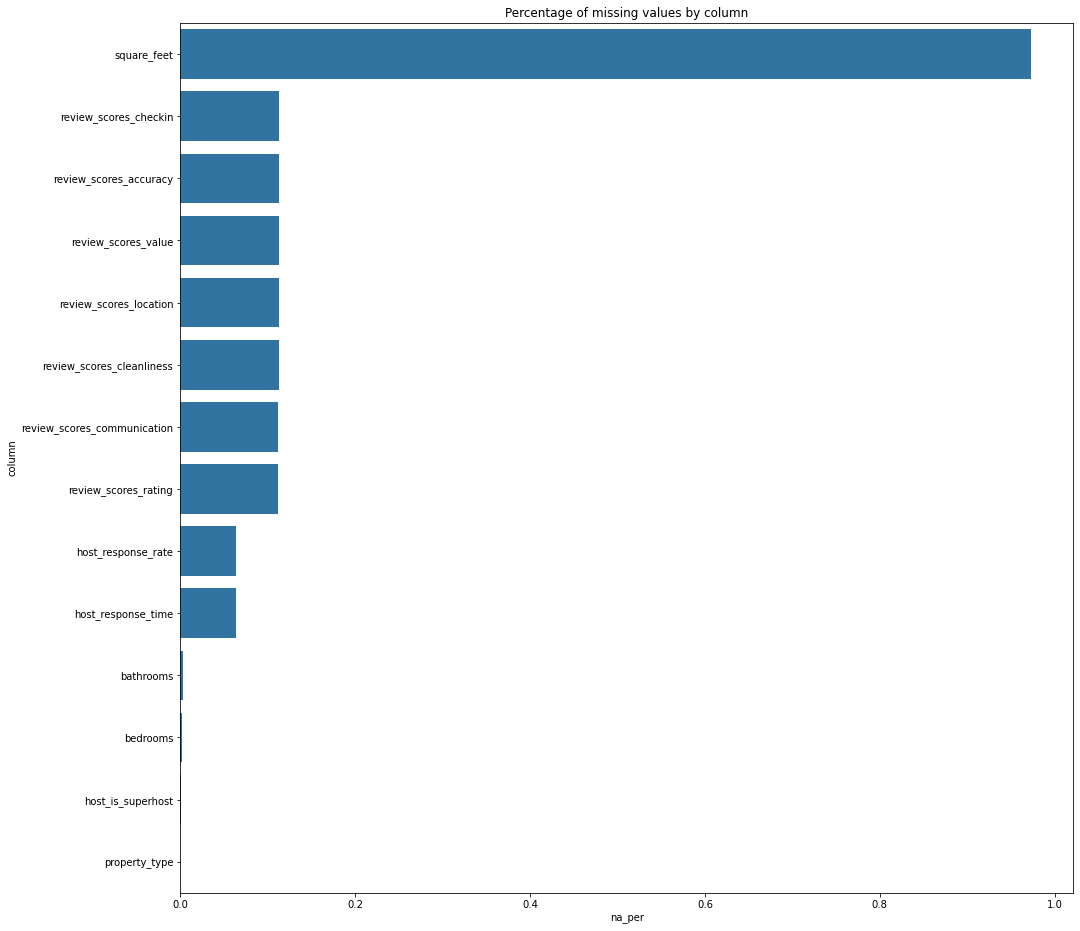

In [127]:
display_nans(df,0)

In [128]:
df.drop("square_feet",inplace=True,axis=1)

,column,na_per
0,review_scores_checkin,1.13e-01
1,review_scores_accuracy,1.13e-01
2,review_scores_value,1.13e-01
3,review_scores_location,1.13e-01
4,review_scores_cleanliness,1.12e-01
5,review_scores_communication,1.12e-01
6,review_scores_rating,1.12e-01
7,host_response_rate,6.35e-02
8,host_response_time,6.35e-02
9,bathrooms,3.37e-03


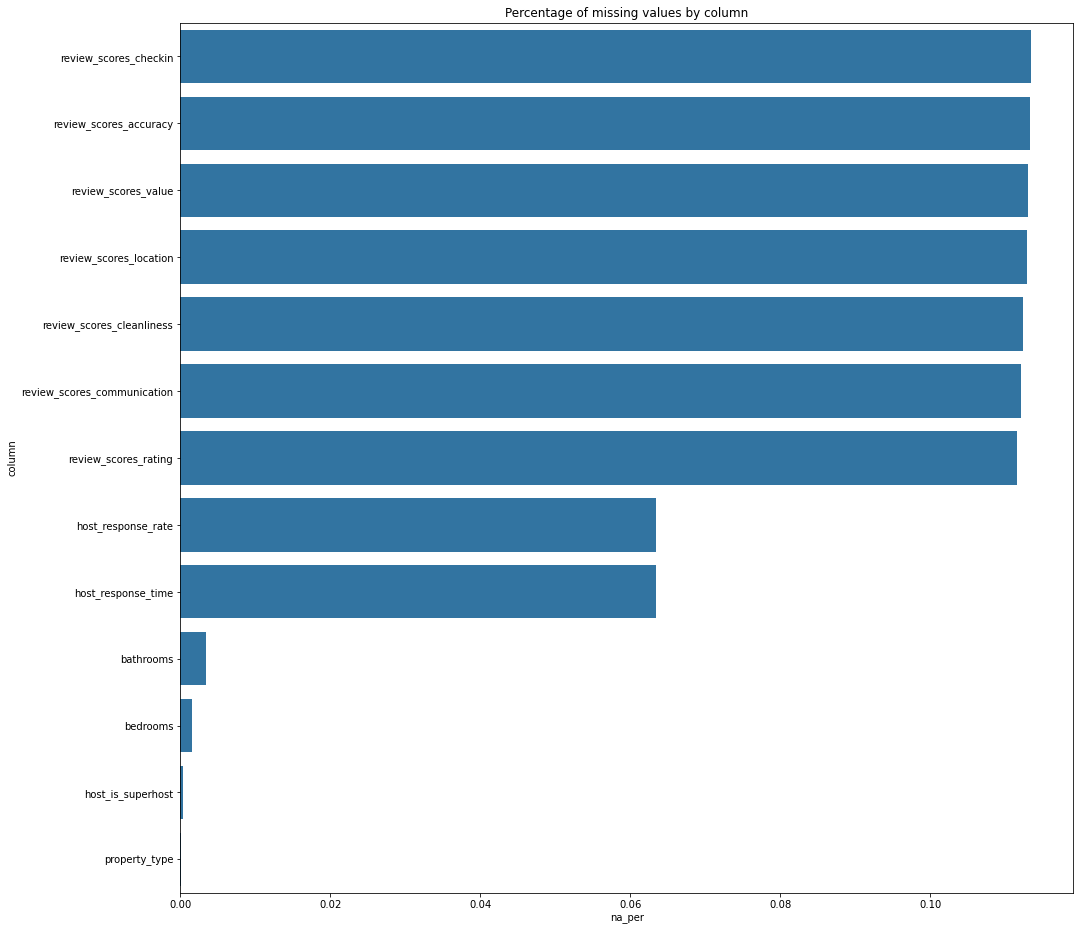

In [129]:
display_nans(df,0)

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

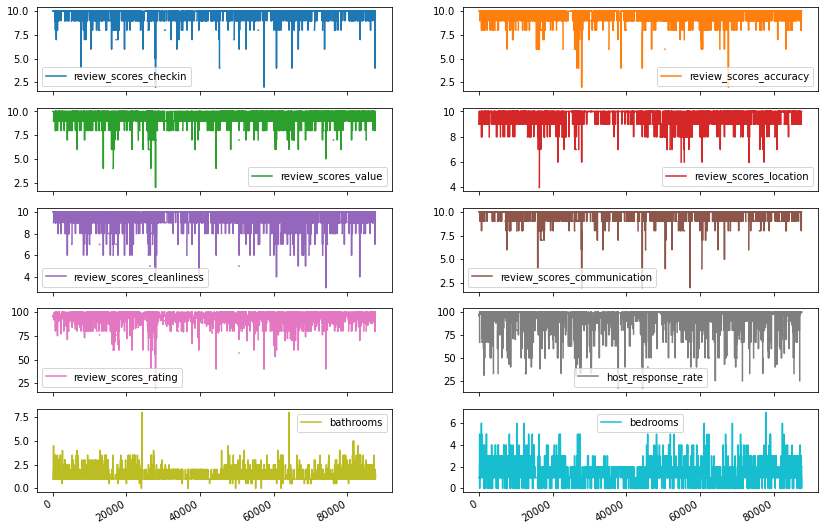

In [130]:
df[df_nan["column"]].plot(subplots=True, layout=(7,2),figsize=(14, 14))


In [131]:
def split_cols(df,concat_cols,chars):
    '''
    input:
        Dataframe
        List of columns that you wish to clean and get dummies for
        list of characters you wish to remove
    output:
        1 - ",' characters are removed
        2 - charcters in chars string are removed
        3 - Original column is dropped and dummie columns are concatenated with prefix of columns name
    
    '''
    for col in concat_cols:
        df[col] = df[col].str.replace('"', "")
        df[col] = df[col].str.replace("'", "")
        for c in chars:
            df[col] = df[col].str.replace(c, "")
        df=pd.concat([df.drop(col, axis=1), df[col].str.get_dummies(sep=",").add_prefix(col+'_').astype(np.int8)], axis=1)
    return df    

chars = " [{}]"

df=split_cols(df,concat_cols,chars)


In [132]:
df_amen=df[df.columns[pd.Series(df.columns).str.startswith('amenities_')]]

In [133]:
df_amen.shape[0]

87608

(df_amen.sum()/df_amen.shape[0]*100)

In [134]:
def cat_onehot(df,method="median"):
        global cat_df
        cat_df = df.select_dtypes(include=['object'])
        cat_cols = cat_df.columns

        df_cat=df.copy()

        for col in  cat_cols:
            df_cat = pd.concat([df_cat.drop(col, axis=1), pd.get_dummies(df_cat[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=True).astype(np.int8)], axis=1)
        
        if method=="median":
            # median function
            fill_med = lambda col: col.fillna(col.median())
            # Fill the median
            df_cat = df_cat.apply(fill_med, axis=0)
        
        if method=="mode":
            # mode function
            fill_mode = lambda col: col.fillna(col.mode()[0])
            # Fill the median
            df_cat = df_cat.apply(fill_mode, axis=0)
        
        return df_cat

df=cat_onehot(df,method="mode")

In [135]:
df.head()

,listing_id,host_response_rate,accommodates,bathrooms,bedrooms,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,month,amenities_24-HourCheck-in,amenities_AirConditioning,amenities_Breakfast,amenities_Buzzer/WirelessIntercom,amenities_CableTV,amenities_CarbonMonoxideDetector,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_ElevatorinBuilding,amenities_Essentials,amenities_Family/KidFriendly,amenities_FireExtinguisher,amenities_FirstAidKit,amenities_FreeParkingonPremises,amenities_Gym,amenities_HairDryer,amenities_Hangers,amenities_Heating,amenities_HotTub,amenities_IndoorFireplace,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_LaptopFriendlyWorkspace,amenities_LockonBedroomDoor,amenities_Otherpet(s),amenities_PetsAllowed,amenities_Petsliveonthisproperty,amenities_Pool,amenities_SafetyCard,amenities_Shampoo,amenities_SmokeDetector,amenities_SmokingAllowed,amenities_SuitableforEvents,amenities_TV,amenities_Washer,amenities_Washer/Dryer,amenities_WheelchairAccessible,amenities_WirelessInternet,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_t,host_is_superhost_nan,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_group_cleansed_nan,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,property_type_nan,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,241032,96.0,4,1.0,1.0,0,0,0,0,1,0.95,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,241032,96.0,4,1.0,1.0,0,0,0,0,1,0.95,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,241032,96.0,4,1.0,1.0,0,0,0,0,1,0.95,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0,2,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,241032,96.0,4,1.0,1.0,0,0,0,0,1,0.95,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0,2,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,241032,96.0,4,1.0,1.0,0,0,0,0,1,0.95,207,95.0,10.0,10.0,10.0,10

In [136]:
df.shape

(87608, 116)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87608 entries, 0 to 87607
Columns: 116 entries, listing_id to require_guest_phone_verification_nan
dtypes: float64(12), int64(9), int8(95)
memory usage: 22.6 MB




        # Mean function
        fill_mean = lambda col: col.fillna(col.mean())
        # Fill the mean
        df_listing_cat = df_listing_cat.apply(fill_mean, axis=0)

In [138]:
#Split into explanatory and response variables
drops=["price","listing_id"]
X = df.drop(drops,axis=1)
y = df["price"]    

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

#print("test score:",test_score," train score:",train_score)

print('Linear Regression MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Linear Regression R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Linear Regression MSE train: 3920.842, test: 3967.078
Linear Regression R^2 train: 0.641, test: 0.638


In [139]:
#prepare train and test datasets for modelling
drops=["price","listing_id"]
X = df.drop(drops,axis=1)
y = df["price"]    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#train RF regressor model
forest = RandomForestRegressor(n_estimators=50, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1,verbose=0,
                              max_depth=4)
forest.fit(X_train, y_train.squeeze())


#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print("Random Forest MSE train: %.3f, test: %.3f" % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print("Random Forest R^2 train: %.3f, test: %.3f" % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 4173.403, test: 4229.053
Random Forest R^2 train: 0.618, test: 0.614


In [140]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    global au_corr
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(X, 10))

Top Absolute Correlations
amenities_Dryer                  amenities_Washer                      0.97
amenities_HairDryer              amenities_Hangers                     0.86
amenities_Hangers                amenities_Iron                        0.86
amenities_HairDryer              amenities_Iron                        0.86
accommodates                     bedrooms                              0.79
amenities_24-HourCheck-in        amenities_HairDryer                   0.78
require_guest_profile_picture_t  require_guest_phone_verification_t    0.77
amenities_24-HourCheck-in        amenities_Hangers                     0.77
amenities_HairDryer              amenities_LaptopFriendlyWorkspace     0.77
amenities_Hangers                amenities_LaptopFriendlyWorkspace     0.76
dtype: float64


In [141]:
#https://mljar.com/blog/visualize-tree-from-random-forest/        r2_score(y_test, y_test_preds)))

# Extract single tree
estimator = forest.estimators_[5]

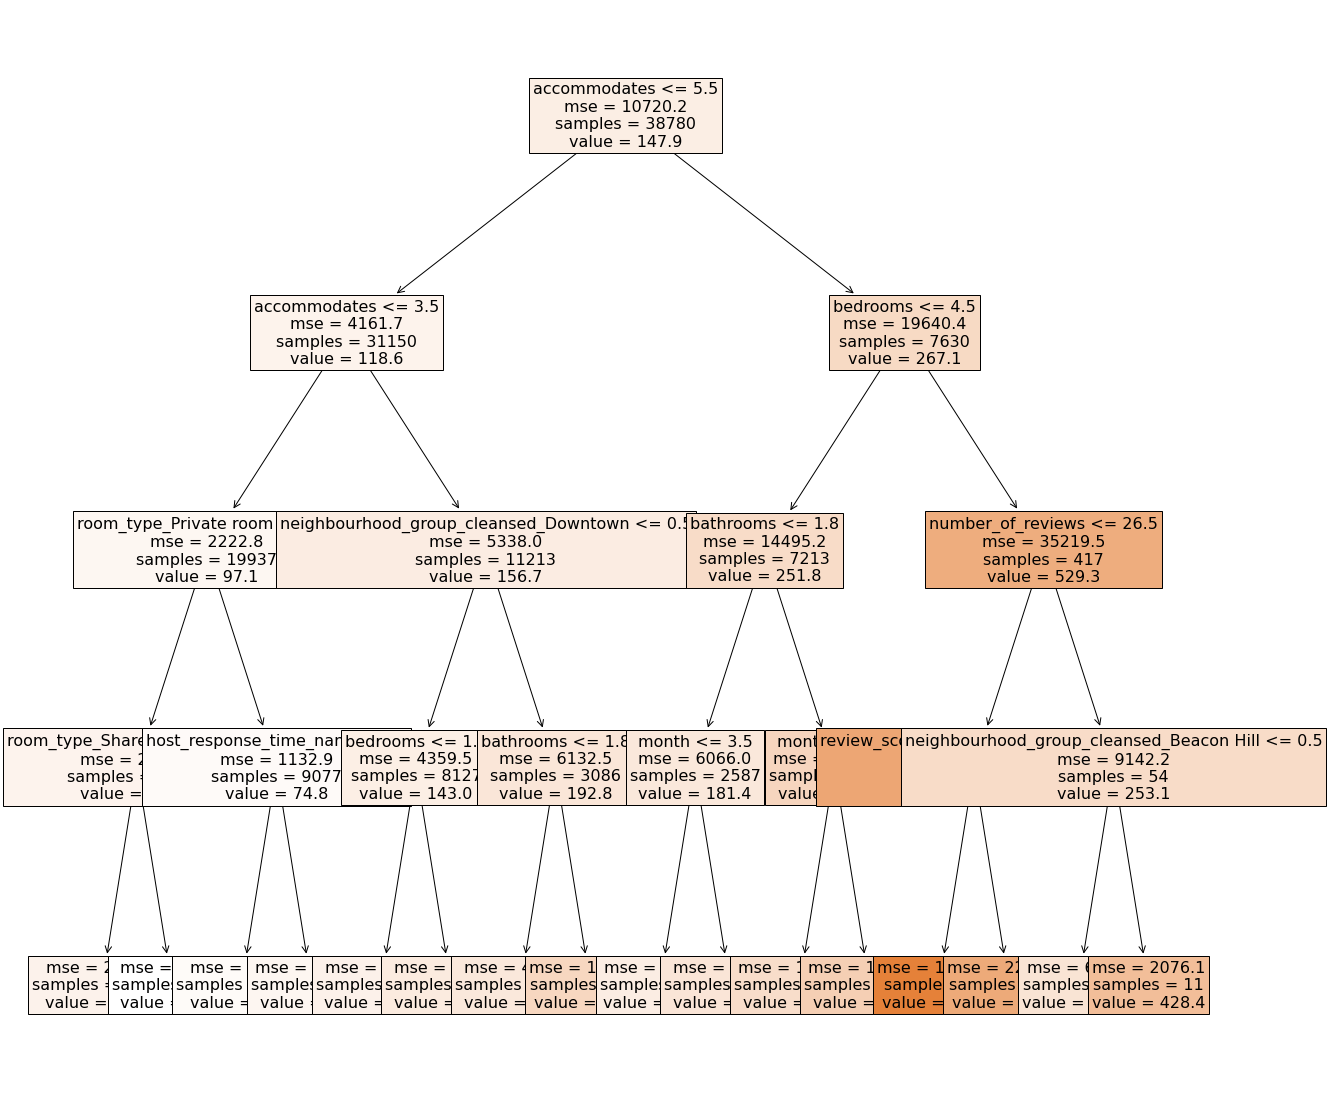

In [142]:
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(estimator, feature_names=X.columns, filled=True,precision=1,fontsize=16)

In [143]:
#prepare train and test datasets for modelling
drops=["price","listing_id"]
X = df.drop(drops,axis=1)
y = df["price"]    


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#train RF regressor model
forest = RandomForestRegressor(n_estimators=50, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1,
                               verbose=0)
forest.fit(X_train, y_train.squeeze())


#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 529.167, test: 928.882
Random Forest R^2 train: 0.952, test: 0.915


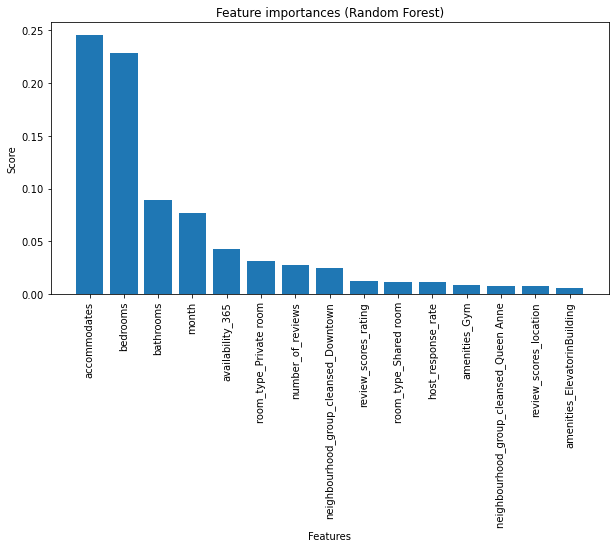

In [144]:

#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

#plot feature importances
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center')
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Random Forest)')
plt.savefig('./feature importances.png')
plt.show()

#prepare train and test datasets for modelling
drops=["price","listing_id"]
X = df.drop(drops,axis=1)
y = df["price"]    


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#train RF regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1,verbose=0)
forest.fit(X, y.values.ravel())


#calculate scores for the model
y_pred = forest.predict(X)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

In [145]:
df['price_prediction'] = y_pred

ValueError: Length of values (73025) does not match length of index (87608)

In [ ]:
df["perc_diff_%"]=(df["price"]-df["price_prediction"])/df["price"]*100
df["potential_value"]=df.apply(lambda row: 0.0 if row['perc_diff_%']>0 else "Potential Value", axis=1)

In [ ]:
df.head()

df[["listing_id","price_y","y_prediction","perc_diff_%","potential_value"]].tail(10)

In [ ]:
df_calendar.head()

In [ ]:
threshold=-180

df_short=df[df["perc_diff_%"]<threshold]
df_short.head()

In [ ]:
df_short=df[df["perc_diff_%"]<threshold]

df_calendar_outlier=df_calendar[(df_calendar["listing_id"].isin(df_short["listing_id"])) & (df_calendar["price"].isin(df_short["price"]))]

In [ ]:
df_calendar_outlier.head(10)

In [ ]:
df_join=df_short[["price_prediction","perc_diff_%","listing_id"]]
df3 = df_calendar_outlier.merge(df_join, on=["listing_id"], how='inner')

In [ ]:
df3.head(20)